In [3]:
# E-commerce Customer Behavior Analytics Platform

# This notebook simulates real-time clickstream events for an e-commerce platform, processes the data for analysis, and prepares it for cloud-based storage (simulated here). The pipeline is designed to be scalable for AWS Glue and Redshift environments.


In [19]:
import pandas as pd
import random
import time
import json
import matplotlib.pyplot as plt
import seaborn as sns

 Simulating Clickstream events


In [21]:
# Simulate 5000 clickstream events
actions = ['view', 'add_to_cart', 'purchase']

def generate_click_event():
    return {
        'user_id': random.randint(1, 5000),
        'product_id': random.randint(1, 300),
        'timestamp': int(time.time()),
        'action': random.choice(actions)
    }

clickstream_data = [generate_click_event() for _ in range(5000)]

# Convert to DataFrame
df_clickstream = pd.DataFrame(clickstream_data)
df_clickstream.head()

Cleaning Data


In [25]:
# Check for null values
print(df_clickstream.isnull().sum())

# Filter only valid actions
valid_actions = ['view', 'add_to_cart', 'purchase']
df_cleaned = df_clickstream[df_clickstream['action'].isin(valid_actions)]

print(f"Total records after cleaning: {len(df_cleaned)}")
df_cleaned.head()

user_id       0
product_id    0
timestamp     0
action        0
dtype: int64
Total records after cleaning: 5000
Product Analysis


In [11]:
# Most popular products
top_products = df_cleaned[df_cleaned['action'] == 'view']['product_id'].value_counts().head(10)
print(top_products)

# Conversion Rate (purchase / view)
views = df_cleaned[df_cleaned['action'] == 'view']['user_id'].nunique()
purchases = df_cleaned[df_cleaned['action'] == 'purchase']['user_id'].nunique()
conversion_rate = (purchases / views) * 100
print(f"Conversion Rate: {conversion_rate:.2f}%")


product_id
103    15
195    12
115    12
284    11
217    11
32     11
105    11
155    11
70     11
189    11
Name: count, dtype: int64
Conversion Rate: 101.13%


Graphical Visualization


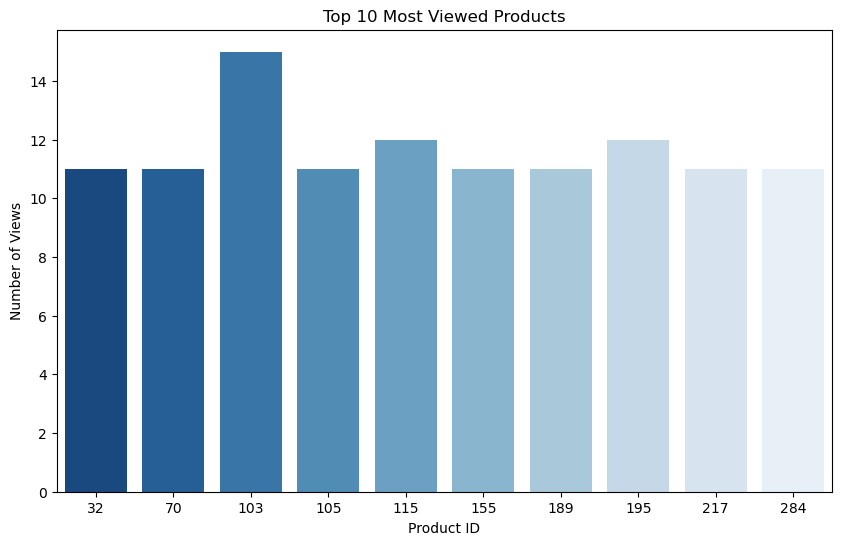

In [29]:
# Top 10 viewed products
plt.figure(figsize=(10,6))
sns.barplot(x=top_products.index, y=top_products.values, palette="Blues_r")
plt.title('Top 10 Most Viewed Products')
plt.xlabel('Product ID')
plt.ylabel('Number of Views')
plt.show()

In [15]:
# Save cleaned data as CSV (this would be uploaded to Redshift via COPY command in real production)
df_cleaned.to_csv('cleaned_clickstream_data.csv', index=False)
print("✅ Cleaned data saved locally, ready for Redshift upload simulation.")


✅ Cleaned data saved locally, ready for Redshift upload simulation.


In [ ]:
# Conclusion

- Generated 5000 clickstream records
- Cleaned data to remove invalid actions
- Analyzed top products and conversion rate
- Prepared cleaned data for cloud storage (Redshift simulation)
- Visualization of product trends

**Note:** For large scale ingestion (5M+ events/day), this pipeline would be migrated to AWS Glue for ETL processing and Redshift Spectrum for querying.
